## 逻辑回归的原理
### Logistic函数(Sigmoid)
$\sigma(x) = \frac{1}{1+e^{-x}}\tag{1}$ 

$\sigma'=\sigma(1-\sigma)\tag{}$

### 二分类
二分类的逻辑回归被定义为:

$P(Y=1|x)=\frac{exp(wx+b)}{1+exp(wx+b)}\tag{}$

$P(Y=0|x)=\frac{1}{1+exp(wx+b)}\tag{}$

P(Y=0|x)+P(Y=1|x) = 1


### 多分类

$$P(Y=k|x)=\frac{exp(w_kx)}{1+\sum_{k=1}^{K-1}exp(w_kx)} \space\space\space\space  k=1,2,...,K-1$$


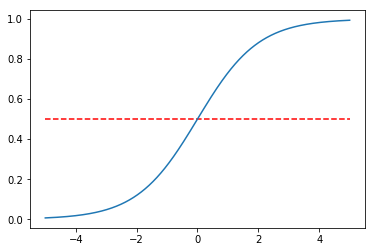

In [10]:
import numpy as np

x = np.linspace(-5, 5, 10000)

import matplotlib.pyplot as plt
plt.plot(x, 1/(1+np.exp(-x)));
plt.hlines(y=0.5, xmin=-5, xmax=5, colors='r' ,linestyles='--');

### Logistic分布
>分布函数

$F(x) = P(X \leq x)= \frac{1}{1+e^{-(x-\mu)/\gamma}}\tag{2}$

>概率密度

$f(x) = F'(x) = \frac{e^{-(x-\mu) / \gamma}}{\gamma (1+e^{-(x-\mu)/\gamma})^2}\tag{3}$

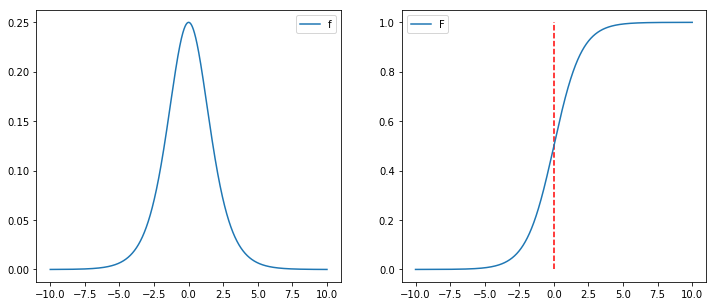

In [2]:
import numpy as np 
x = np.linspace(-10,10,100000)
plt.subplots(figsize=(12, 5))
plt.subplot(121)
plt.plot(x, np.exp(-x)/(1+np.exp(-x))**2)
plt.legend("fx")
plt.subplot(122)
plt.plot(x, 1/(1+np.exp(-x)))
plt.legend('Fx')
plt.vlines(x=0, ymin=0, ymax=1., color='r', linestyles='--');

## 逻辑回归与线性回归的联系与区别
> 区别

逻辑回归是分类方法

> 联系

一个事件的几率是发生概率与不发生概率的比值,
该事件的对数几率(logit)为

$logit(p)=log\frac{p}{1-p}$

对逻辑回归
$log\frac{P(Y=1|x)}{1-P(Y=1|x}=wx$
 
输出Y=1的对数几率与输入x间的关系相当于是线性回归

## 逻辑回归的损失函数推导及优化
### 损失
对逻辑回归模型, 通常用极大似然估计来估计模型参数
以二分类为例

$$h_\theta(x)=\sigma(\theta^Tx)$$

$$P(y=1|x;\theta)=h_\theta(x)$$

$$P(y=0|x;\theta)=1-h_\theta(x)$$

则极大似然函数为
$$p(y|x;\theta)=\prod_{i=1}^{N}(h_\theta(x_i))^{y_i}(1-h_\theta(x_i))^{1-y_i}$$

对数似然为
$$\mathcal L(\theta)=\sum_{i=1}^{N}[y_ilogh_\theta(x_i)+(1-y_i)log(1-h_\theta(x_i)]\\=  \sum_{i=1}^{N}[y_i(\theta x_i)-log(1+exp(\theta x_i))]$$

偏导
$$\frac{\partial \mathcal L}{\partial \theta_i} = (y-h_\theta(x))x_i$$

## 优化
$常用的\theta的优化方法是梯度下降和拟牛顿法$

## 正则化与模型评估指标
### 正则化
- L1
- L2

### 神经网络中的正则化
- Dropout
- BN
- LRN

### 评估指标
- 准确率

预测的有多少是对的
- 召回率

对的里面有多少被预测中了

- F1

准确率与召回率的调和平均

## 逻辑回归的优缺点
>优点

- 模型简单, 解释性强
- 概率形式输出

>缺点

- 要得到好的分类结果, 对特征要求较高

## 样本不均衡问题解决办法
- 样本上/下采样
- Focal loss

## Sklearn

In [3]:
from sklearn import datasets
load_datasets = datasets.make_classification
data = load_datasets(n_samples=100, n_features=2, n_classes=2, n_redundant=0,)

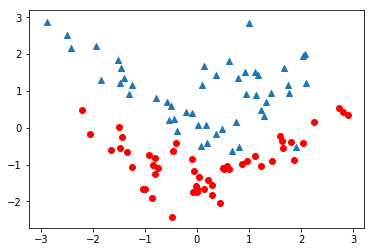

In [4]:
import matplotlib.pyplot as plt
plt.scatter(data[0][data[1]==0, 0], data[0][data[1]==0, 1], c='r')
plt.scatter(data[0][data[1]==1, 0], data[0][data[1]==1, 1], marker='^');

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [6]:
lr.fit(data[0], data[1])

/home/wcw/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
lr.coef_

array([[-0.09593863,  2.36805522]])

In [8]:
lr.intercept_

array([0.13780219])

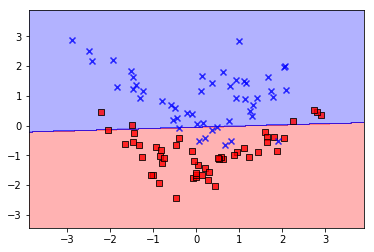

In [11]:
import numpy as np
from matplotlib.colors import ListedColormap
# https://github.com/rasbt/python-machine-learning-book-2nd-edition/tree/master/code/ch03
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

plot_decision_regions(X=data[0], y=data[1],
                      classifier=lr, test_idx=range(105, 150))        